# Distribution manipulation

In this example we are going to exhibit some of the main distribution methods.

In [1]:
from __future__ import print_function
import openturns as ot

In [2]:
# Create an 1-d distribution
dist_1 = ot.Normal()

# Create a 2-d distribution
dist_2 = ot.ComposedDistribution([ot.Normal(), ot.Triangular(0.0, 2.0, 3.0)], ot.ClaytonCopula(2.3))

# Create a 3-d distribution
copula_dim3 = ot.Student(5.0, 3).getCopula()
dist_3 = ot.ComposedDistribution([ot.Normal(), ot.Triangular(0.0, 2.0, 3.0), ot.Exponential(0.2)], copula_dim3)

In [3]:
# Get the dimension fo the distribution
dist_2.getDimension()

2

In [4]:
# Get the 2nd marginal
dist_2.getMarginal(1)

class=Triangular name=Triangular dimension=1 a=0 m=2 b=3

In [5]:
# Get a 2-d marginal
dist_3.getMarginal([0, 1]).getDimension()

2

In [6]:
# Get the copula
copula = dist_2.getCopula()

In [7]:
# Ask some properties on the copula
dist_2.hasIndependentCopula(), dist_2.hasEllipticalCopula()

(False, False)

In [8]:
# mean vector of the distribution
dist_2.getMean()

class=Point name=Unnamed dimension=2 values=[0,1.66667]

In [9]:
# standard deviation vector of the distribution
dist_2.getStandardDeviation()

class=Point name=Unnamed dimension=2 values=[1,0.62361]

In [10]:
# covariance matrix of the distribution
dist_2.getCovariance()

class=CovarianceMatrix dimension=2 implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[1,0.491927,0.491927,0.388889]

In [11]:
# skewness vector of the distribution
dist_2.getSkewness()

class=Point name=Unnamed dimension=2 values=[0,-0.305441]

In [12]:
# kurtosis vector of the distribution
dist_2.getKurtosis()

class=Point name=Unnamed dimension=2 values=[3,2.4]

In [13]:
# Get one realization
dist_2.getRealization()

class=Point name=Unnamed dimension=2 values=[0.331526,2.46203]

In [14]:
# Get several realizations
dist_2.getSample(5)

class=Sample name=ComposedDistribution implementation=class=SampleImplementation name=ComposedDistribution size=5 dimension=2 description=[X0,X1] data=[[-1.10179,0.547287],[-0.393278,2.47375],[1.40966,2.19767],[-1.5284,0.576385],[0.566232,1.92069]]

In [15]:
# Evaluate the PDF at the mean point
dist_2.computePDF(dist_2.getMean())

0.3528005531670077

In [16]:
# Evaluate the CDF at the mean point
dist_2.computeCDF(dist_2.getMean())

0.3706626446357781

In [17]:
# Evaluate the complementary CDF
dist_2.computeComplementaryCDF(dist_2.getMean())

0.6293373553642219

In [18]:
# Evaluate the survival function at the mean point
dist_2.computeSurvivalFunction(dist_2.getMean())

0.4076996816728151

In [19]:
# Evaluate the PDF on a sample
dist_2.computePDF(dist_2.getSample(5))

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=5 dimension=1 data=[[0.268302],[0.173927],[0.102845],[0.214422],[0.0666785]]

In [20]:
# Evaluate the CDF on a sample
dist_2.computeCDF(dist_2.getSample(5))

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=5 dimension=1 data=[[0.351268],[0.0756611],[0.157737],[0.0188674],[0.956122]]

In [21]:
# Evaluate the probability content of an 1-d interval
interval = ot.Interval(-2.0, 3.0)
dist_1.computeProbability(interval)

0.9758999700201907

In [22]:
# Evaluate the probability content of a 2-d interval
interval = ot.Interval([0.4, -1], [3.4, 2])
dist_2.computeProbability(interval)

0.129833882783416

In [23]:
# Evaluate the quantile of order p=90%
dist_2.computeQuantile(0.90)

class=Point name=Unnamed dimension=2 values=[1.60422,2.59627]

In [24]:
# and the quantile of order 1-p
dist_2.computeQuantile(0.90, True)

class=Point name=Unnamed dimension=2 values=[-1.10363,0.899591]

In [25]:
# Evaluate the quantiles of order p et q
# For example, the quantile 90% and 95%
dist_1.computeQuantile([0.90, 0.95])

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=2 dimension=1 data=[[1.28155],[1.64485]]

In [26]:
# and the quantile of order 1-p and 1-q
dist_1.computeQuantile([0.90, 0.95], True)

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=2 dimension=1 data=[[-1.28155],[-1.64485]]

In [27]:
# Evaluate the characteristic function of the distribution (only 1-d)
dist_1.computeCharacteristicFunction(dist_1.getMean()[0])

(1+0j)

In [28]:
# Evaluate the derivatives of the PDF with respect to the parameters at mean
dist_2.computePDFGradient(dist_2.getMean())

class=Point name=Unnamed dimension=6 values=[0,-0.398942,0.12963,-0.277778,-0.185185,0]

In [29]:
# Evaluate the derivatives of the CDF with respect to the parameters at mean
dist_2.computeCDFGradient(dist_2.getMean())

class=Point name=Unnamed dimension=6 values=[-0.398942,-0,-0.169753,-0.231481,-0.555556,0]

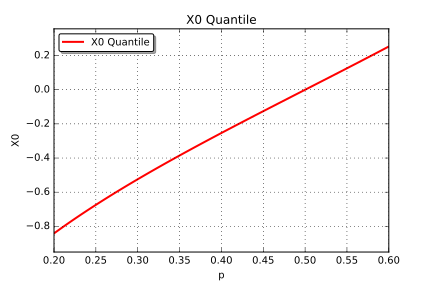

In [30]:
# Draw an 1-d quantile curve

# Define the range and the number of points
qMin = 0.2
qMax = 0.6
nbrPoints = 101
quantileGraph = dist_1.drawQuantile(qMin, qMax, nbrPoints)
quantileGraph

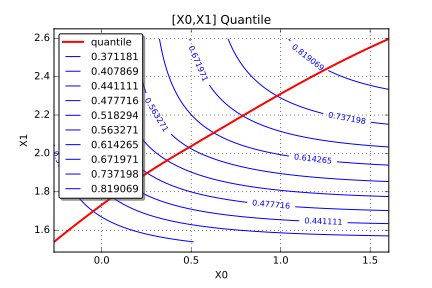

In [31]:
# Draw a 2-d quantile curve

# Define the range and the number of points
qMin = 0.3
qMax = 0.9
nbrPoints = 101
quantileGraph = dist_2.drawQuantile(qMin, qMax, nbrPoints)
quantileGraph